D√©finissons un ensemble de fonctions qui vont nous aider √† visualiser plus simplement les r√©sultats des diff√©rents classificateurs apr√®s avoir import√© les diff√©rents mod√®les.

In [1]:
%matplotlib inline

# Code source: Ga√´l Varoquaux
#              Andreas M√ºller
# Modified for documentation by Jaques Grobler
# Traduit et d√©compos√© par Camille Besse
# License: BSD 3 clause
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF, Matern, RationalQuadratic, ExpSineSquared, DotProduct, ConstantKernel
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

fg = (24,8)
cm_points = ListedColormap(['#FF0000','#FFFFFF', '#00FF00','#000000', '#0000FF'])
cm = 'jet_r'
params = {'figure.titlesize': 'xx-large',
          'font.size': '12',
          'text.color': 'k',
          'figure.figsize': fg,
         }
pylab.rcParams.update(params)



Automatically created module for IPython interactive environment


In [2]:
def creationMesh(X):
    """
    Cr√©e un grille sur un espace bidimensionnel. Prends le min et le max de chaque dimension et calcule la grille avec une r√©solution de 0.02. 
    X: un vecteur √† deux colonnes de donn√©es. 
    """
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx,yy


def plotClassifierOnData(name,clf,data,i=3,n=1,multi=False):
    """
    Pour Afficher les r√©cultat d'un classificateur sur un dataset
    name : le titre du graphique
    clf : le classificateur √† utiliser
    data : les donn√©es √† utiliser
    i : Le i√®me graphique sur n √† afficher (pour afficher 3 graphiques par ligne)
    n : Le nombre total de graphiques √† afficher
    multi: d√©termine si on affiche juste la fronti√®re de d√©cision (true) ou 
           le score/proba de chaque point de l'espace car on ne peut afficher le score en multiclasse.
    """
    
    # Pr√©paration rapide des donn√©es : 
    # normalisation des donn√©es 
    X, y = data
    X = StandardScaler().fit_transform(X)
    # S√©paration des donn√©es en TRAIN - TEST
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=rng_seed)
    # Pour la visualisation des r√©gions et calcul des bornes 
    xx,yy = creationMesh(X)

    # creation du bon nombre de figures √† afficher (3 par lignes)
    ax = plt.subplot(n/3,3,i)
    
    # entrainement du classificateur et calcul du score final (accuracy)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    # Pour afficher les fronti√®res de d√©cision on va choisir une color pour 
    # chacun des points x,y du mesh [x_min, x_max]x[y_min, y_max].

    # Si on est en multiclasse (2 ou +) on affiche juste les fronti√®res
    if multi:
         Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    else:# sinon on peut afficher le gradient du score
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # On affiche le mesh de d√©cision
    Z = Z.reshape(xx.shape)
    test = ax.contourf(xx, yy, Z, 100, cmap=cm, alpha=.8)

    #On affiche la l√©gende
    cbar = plt.colorbar(test)
    cbar.ax.set_title('score')
    
    # On affiche les points d'entrainement
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_points,
               edgecolors='k',s=100)
    # Et les points de test
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_points, 
               edgecolors='k',marker='X',s=100)

    # on d√©finit les limites des axes et autres gogosses
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    
    ax.set_title(name,fontsize=22)
    # dont le score en bas √† droite
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')


def plotClassifier(name, clf, datasets):
    """
    Affiche pour un classificateur donn√©, son r√©sultat sur l'ensemble des datasets pr√©alablement d√©termin√©s
    name : le nom du classificateur √† afficher (titre du graphique)
    clf : un classificateur de scikit-learn
    datasets : une liste de datasets
    """
    f = plt.figure(figsize=fg)
    # Pour chacun des DataSet
    for ds_cnt, ds in enumerate(datasets):
        plotClassifierOnData(name, clf, ds,ds_cnt+1,3)

    plt.tight_layout()
    plt.show()

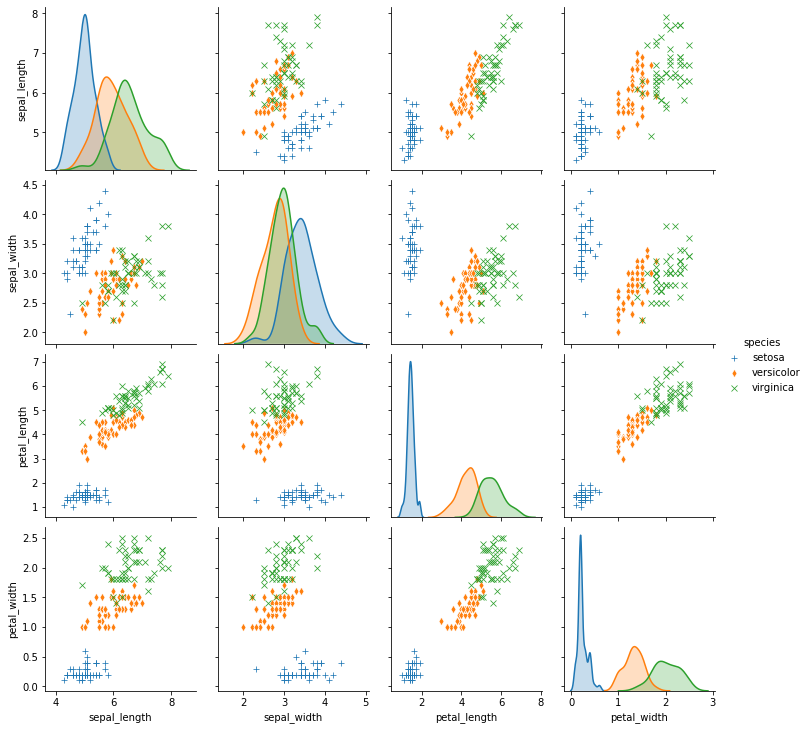

sepal_length  sepal_width  petal_length  petal_width     species
47            4.6          3.2           1.4          0.2      setosa
15            5.7          4.4           1.5          0.4      setosa
65            6.7          3.1           4.4          1.4  versicolor
7             5.0          3.4           1.5          0.2      setosa
122           7.7          2.8           6.7          2.0   virginica
78            6.0          2.9           4.5          1.5  versicolor
115           6.4          3.2           5.3          2.3   virginica
12            4.8          3.0           1.4          0.1      setosa
141           6.9          3.1           5.1          2.3   virginica
29            4.7          3.2           1.6          0.2      setosa

In [3]:
import pandas as pd
import seaborn as sns


import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.multiclass import OneVsRestClassifier,OneVsOneClassifier
from sklearn.preprocessing import StandardScaler,LabelEncoder


from sklearn.model_selection import train_test_split

## Pour le g√©n√©rateur de nombre pseu-al√©atoires et la reproductibilit√© des r√©sultats
rng_seed = 0 

## D√©finition du noyau RBF
noyauRBF = 1.0 * RBF(length_scale=1.0, length_scale_bounds=(1e-1, 10.0))

iris = sns.load_dataset("iris")

g = sns.pairplot(iris, hue='species', markers=['+','d','x'])
plt.show()
iris.sample(10)

# Rappel : S√©parer les donn√©es en deux : entrainement et test

In [4]:
X = iris.drop('species', axis=1)
y = iris['species']

# Vous pouvez affichier les informations du dataset
# print(X.head())
# print(X.shape)
# print(y.head())
# print(y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rng_seed)

Une fois s√©par√©s on peut valider quelle serait la meilleure valeur de  ùëò  dans un  ùëò -NN sur l'ensemble des donn√©es d'entrainement.

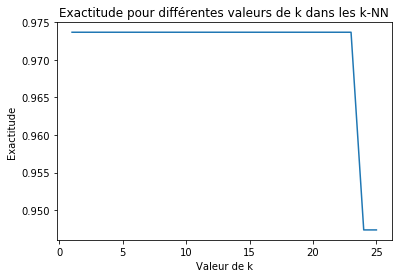

In [5]:
# experimentons avec diff√©rentes valeurs de k
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Valeur de k')
plt.ylabel('Exactitude')
plt.title('Exactitude pour diff√©rentes valeurs de k dans les k-NN')
plt.show()

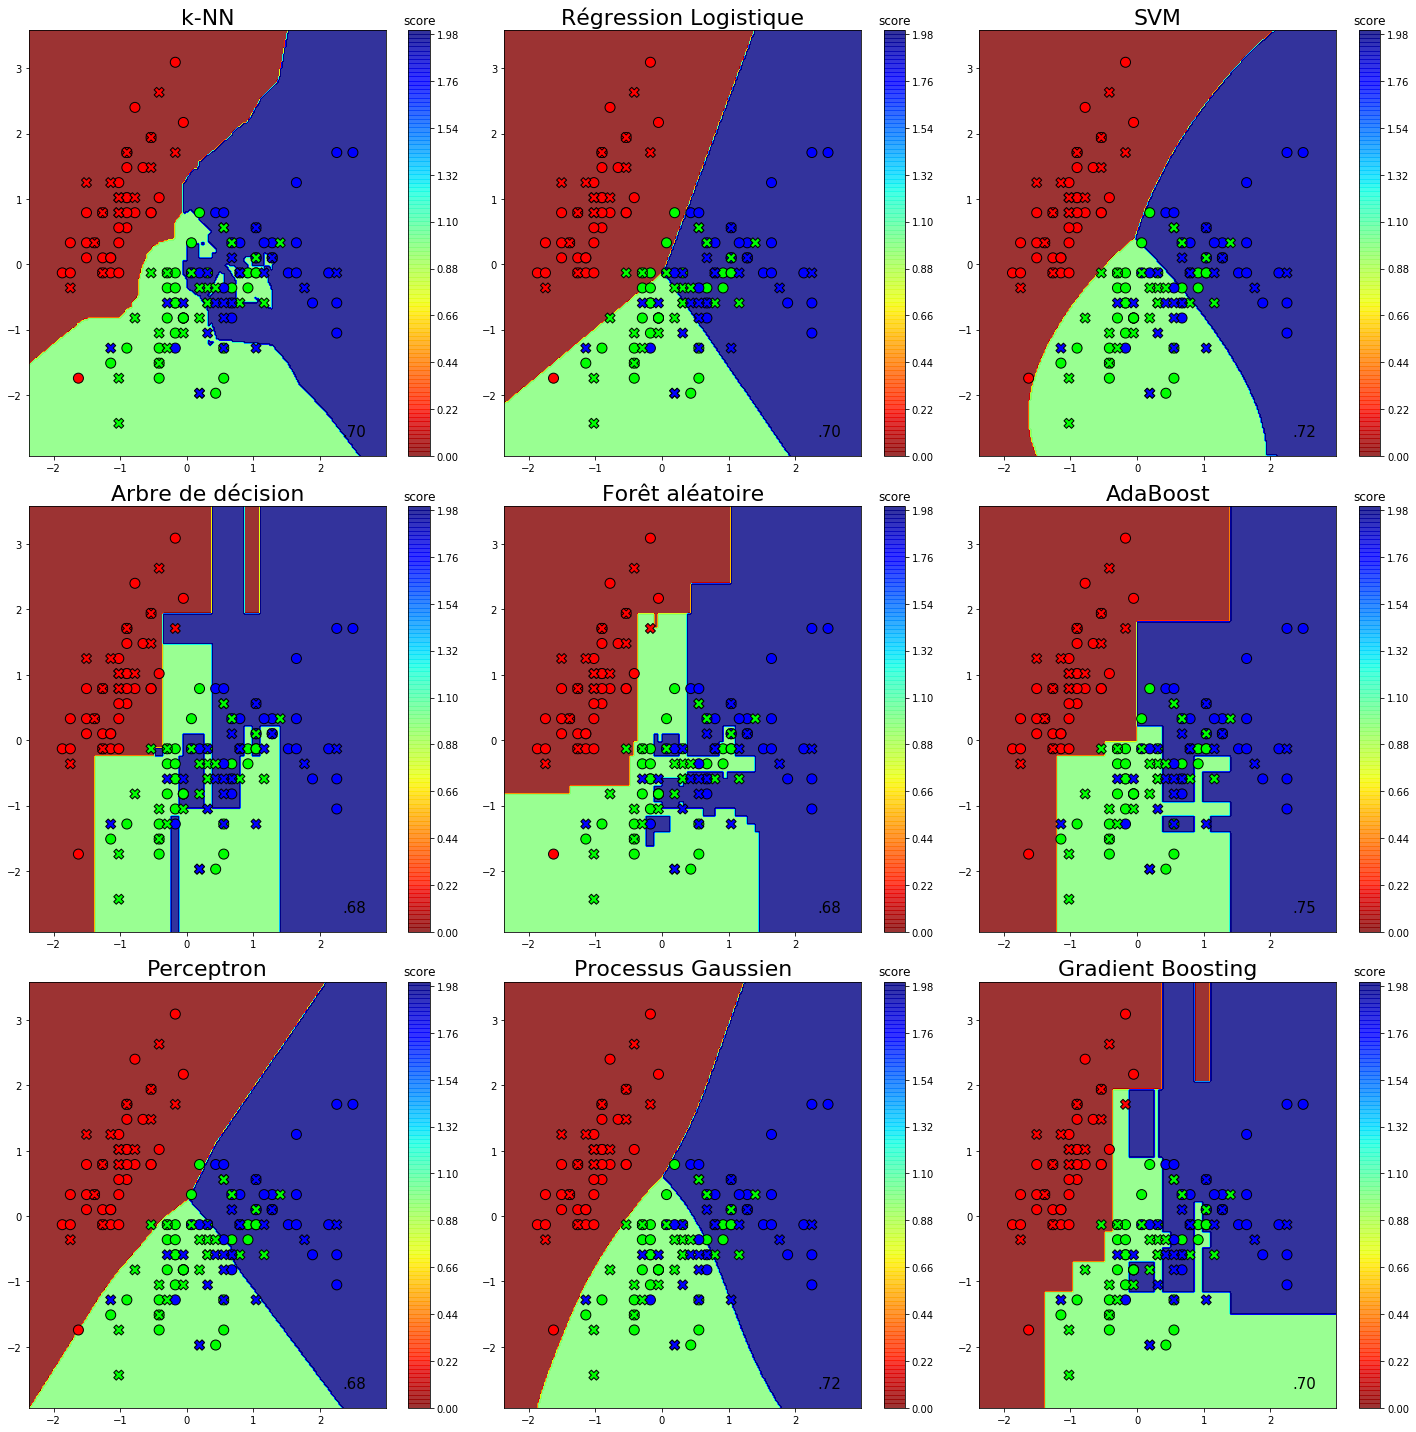

In [6]:

#Choisir les caract√©ristiques en entr√©e: 
c0 = 'sepal_length'
c1 = 'sepal_width'
c2 = 'petal_length'
c3 = 'petal_width'

f1 = c0
f2 = c1
#  ----------------------

# Param√©trer les classificateurs
clfs = [
    KNeighborsClassifier(n_neighbors=3, weights='uniform', leaf_size=30),
    LogisticRegression(random_state=rng_seed,max_iter=1000,penalty='l2',C=0.01,solver='liblinear'),
    SVC(kernel='rbf', C=1,gamma=.2,max_iter=1000),
    DecisionTreeClassifier(max_depth=6, random_state=rng_seed),
    RandomForestClassifier(max_depth=6, n_estimators=15, max_features=2, random_state=rng_seed),
    AdaBoostClassifier(n_estimators=15, learning_rate=0.5,random_state=rng_seed),
    MLPClassifier(hidden_layer_sizes=(5,), activation='relu', alpha=0.01, max_iter=10000, random_state=rng_seed),
    GaussianProcessClassifier(kernel=noyauRBF),
    GradientBoostingClassifier(n_estimators=15, learning_rate=0.5, subsample=1, max_depth=2, random_state=rng_seed),
]
# Liste des noms associ√©s
clf_names = [
    'k-NN','R√©gression Logistique','SVM',
    'Arbre de d√©cision','For√™t al√©atoire','AdaBoost',
    'Perceptron','Processus Gaussien','Gradient Boosting'   
]

#  ----------------------

# Cr√©ation du dataset 
X = iris[[f1,f2]].values

## Encodage des esp√®ces en valeurs num√©riques pour la coloration
le = LabelEncoder()
le.fit(iris.species.unique())
y = le.transform(iris.species)
data_iris = [X,y]
#  ----------------------

# Affichage des fronti√®res de d√©cision pour nos neuf classificateurs 
f = plt.figure(figsize= (20,20))

# Pour chacun des Classificateurs
for cnt, clf in enumerate(clfs):
    plotClassifierOnData(clf_names[cnt], OneVsRestClassifier(clf), data_iris,cnt+1,len(clfs),True)


plt.tight_layout()
plt.show()

Voyons les matrices de confusion pour ces classificateurs :

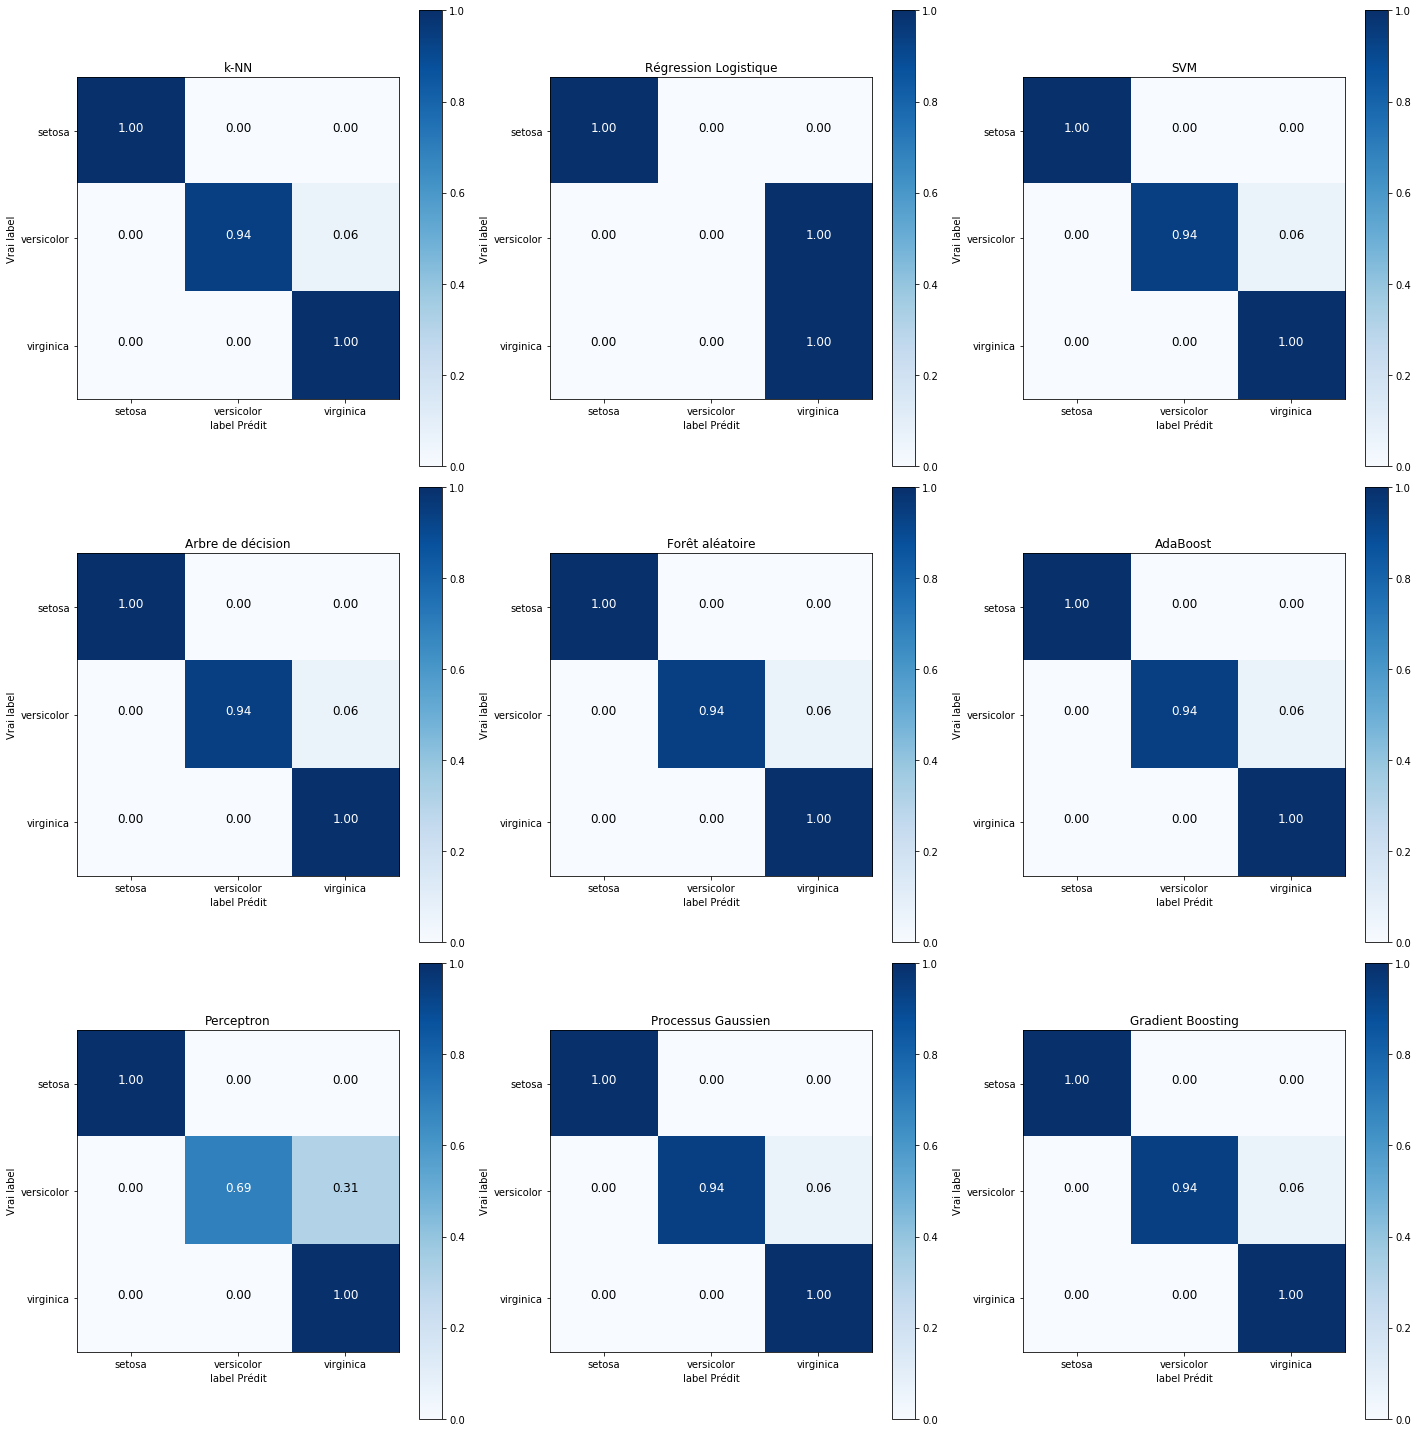

In [7]:
import itertools
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

def plot_confusion_matrix(clf,classes,                       
                          title,i,n,X_train,y_train,
                          cmap=plt.cm.Blues):
    """
    Cette fonction calcule et affiche la matrice de confusion pour un classificateur donn√©.
    clf : classificateur
    classes : les classes √† d√©terminer dans le dataset
    title : 
    """
    y_pred = clf.fit(X_train, y_train).predict(X_test)

    # Calcul de la matrice de confusion
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    cnf_matrix  = cnf_matrix .astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis]

    ax = plt.subplot(n/3,3,i)
    test = ax.imshow(cnf_matrix, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    cbar = plt.colorbar(test)

    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticks(tick_marks)
    ax.set_yticklabels(classes)

    thresh = cnf_matrix.max() / 2.
    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, format(cnf_matrix[i, j], '.2f'),
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black",size=12)

    
    ax.set_ylabel('Vrai label')
    ax.set_xlabel('label Pr√©dit')


# Affichage des matrices de confusion pour nos neuf classificateurs 
f = plt.figure(figsize= (20,20))

# Pour chacun des Classificateurs
for cnt, clf in enumerate(clfs):
    plot_confusion_matrix(OneVsRestClassifier(clf), iris.species.unique(), clf_names[cnt],cnt+1,len(clfs),X_train,y_train)

plt.tight_layout()
plt.show()

# Multiclasse : A vous de jouer !

Dans cet exercice vous avez les moyens de maintenant choisir le bon classificateur et ses hyperparam√®tres en utilisant toutes les connaissances de la journ√©e.

Nous allons charger un dataset contenant 4 types de fruits (Pommes, Oranges, Mandarines et Citrons) et c'est √† vous de d√©terminer √† partir de leur masse, hauteur, largeur, couleur, quels sont les types de fruits.

Un exemple de code vous est donn√© pour pouvoir visualiser les donn√©es, mais rappelez vous qu'il est plus int√©ressant d'utiliser l'ensemble des donn√©es plutot que juste deux colonnes de celles-ci !

In [8]:
# Importation du fichier de donn√©es
import wget

!rm './fruits.csv'
wget.download('https://raw.githubusercontent.com/iid-ulaval/EEAA-datasets/master/fruits.csv','./fruits.csv')

rm: ./fruits.csv: No such file or directory


'./fruits.csv'

In [9]:
# On √©limine la colonne "subtype" qui pourra faire l'objet d'exercieces suppl√©mntaires
fruits = pd.read_csv('fruits.csv', sep=',').drop('fruit_subtype',axis=1)

Jetons un oeuil aux donn√©es:

Tout d'abord les 10 premiers √©l√©ments.

In [10]:
fruits.sample(10)

fruit_label fruit_name  mass  width  height  color_score
25            3     orange   356    9.2     9.2         0.75
20            1      apple   160    7.5     7.5         0.86
19            1      apple   162    7.4     7.2         0.85
39            3     orange   144    6.8     7.4         0.75
41            3     orange   180    7.6     8.2         0.79
57            4      lemon   152    6.5     8.5         0.72
44            4      lemon   200    7.3    10.5         0.72
49            4      lemon   132    5.8     8.7         0.73
46            4      lemon   216    7.3    10.2         0.71
36            3     orange   160    7.1     7.6         0.76

Puis, √©tudions les relations qui existent entre chaque pair de carat√©ristiques.

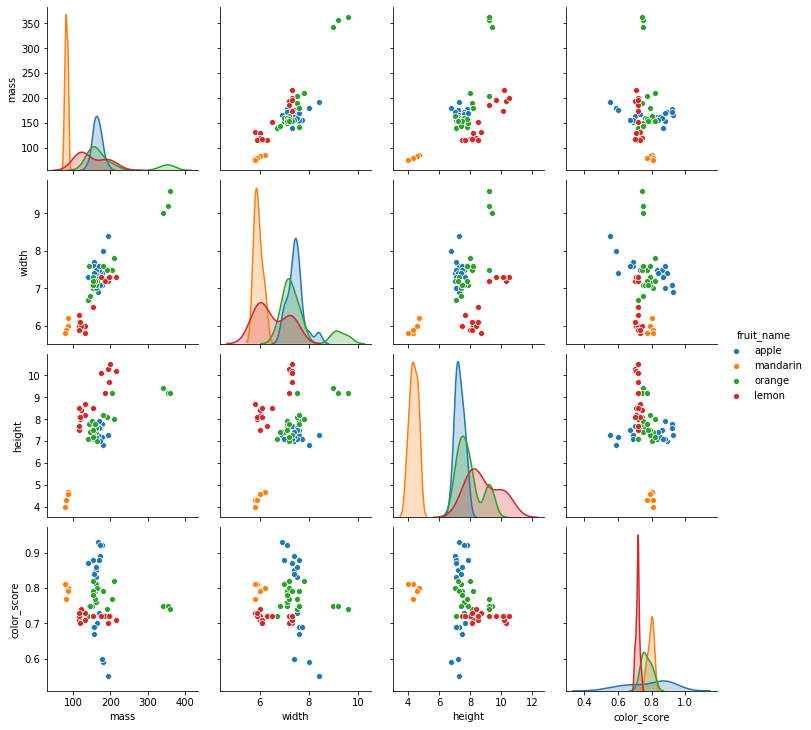

In [11]:
g = sns.pairplot(fruits.drop('fruit_label',axis=1), hue='fruit_name')
plt.show()

Exercice : Le code suivant montre l'apprentissage et la visualisation des r√©sultats avec 2 caract√©ristiques seulement. L'objectif √©tant bien sur de trouver la meilleure combinaison algorithme/hyperparam√®tres pour l'ensemble des caract√©ristiques, √† vous d'adapter le code suivant :

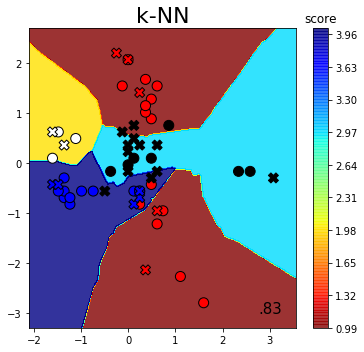

In [12]:
#Choisir les caract√©ristiques en entr√©e: 
c0 = 'mass'
c1 = 'width'
c2 = 'height'
c3 = 'color_score'

#  ----------------------

# Cr√©ation du dataset 
X = fruits[[c1,c3]].values
y = fruits['fruit_label']
data = [X,y]
#  ----------------------

# Choix du classificateur

choix = 0

# Choix des hyper-param√®tres (grid search ? cross-validation ?)
clfs = [
    KNeighborsClassifier(n_neighbors=3, weights='uniform', leaf_size=30),
    LogisticRegression(random_state=rng_seed,max_iter=1000,penalty='l2',C=0.01,solver='liblinear'),
    SVC(kernel='rbf', C=1,gamma=.2,max_iter=1000),
    DecisionTreeClassifier(max_depth=6, random_state=rng_seed),
    RandomForestClassifier(max_depth=6, n_estimators=15, max_features=2, random_state=rng_seed),
    AdaBoostClassifier(n_estimators=100, learning_rate=0.3,random_state=rng_seed),
    MLPClassifier(hidden_layer_sizes=(5,), activation='relu', alpha=0.01, max_iter=1000, random_state=rng_seed),
    GaussianProcessClassifier(kernel=noyauRBF),
    GradientBoostingClassifier(n_estimators=15, learning_rate=0.5, subsample=1, max_depth=2, random_state=rng_seed),
]

clf_names = [
    'k-NN','R√©gression Logistique','SVM',
    'Arbre de d√©cision','For√™t al√©atoire','AdaBoost',
    'Perceptron','Processus Gaussien','Gradient Boosting'   
]


# Affichage des fronti√®res de d√©cision pour le classificateur choisi (OvO ? OvR ?)
f = plt.figure(figsize= (15,5))
plotClassifierOnData(clf_names[choix], OneVsOneClassifier(clfs[choix]), data,1,3,True)
plt.tight_layout()
plt.show()